In [44]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv


## ✈️ Airline Passenger Satisfaction Analysis & Prediction

In today's competitive airline industry, understanding **customer satisfaction** is crucial for improving service quality, retaining loyal passengers, and attracting new ones. This project focuses on analyzing key passenger attributes and travel details to predict whether a customer is **satisfied or dissatisfied** with their flight experience.

Using a structured data science workflow — from **data cleaning** and **exploration** to **transformation**, **modeling**, and **evaluation** — we aim to build a machine learning model that can reliably predict customer satisfaction **before** or **during** their travel, without relying on subjective post-flight feedback.

By excluding service-related ratings and focusing on objective travel data (like travel class, delays, flight distance, and customer type), we ensure our model is more **realistic** and **generalizable** for use in real-time prediction scenarios.

Let’s dive into the data and uncover the patterns behind satisfied (and unsatisfied) airline passengers!


## Importing Libraries

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Exploration

In [46]:
data=pd.read_csv("/kaggle/input/airlines-customer-satisfaction/Invistico_Airline.csv")

In [47]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [48]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [49]:
data.shape

(129880, 23)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [51]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Data Cleaning

#### 1) Missing Values

In [52]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [53]:
column = ["Arrival Delay in Minutes"]
data = data.dropna(subset=column)

In [54]:
data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [55]:
for col in data.select_dtypes("object"):
    print(f"{col} : \n {data[col].value_counts()}")

satisfaction : 
 satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64
Gender : 
 Gender
Female    65703
Male      63784
Name: count, dtype: int64
Customer Type : 
 Customer Type
Loyal Customer       105773
disloyal Customer     23714
Name: count, dtype: int64
Type of Travel : 
 Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64
Class : 
 Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64


#### 2) Duplicated Values

In [56]:
data.duplicated().sum()

0

In [57]:
data.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

## Data Analysis

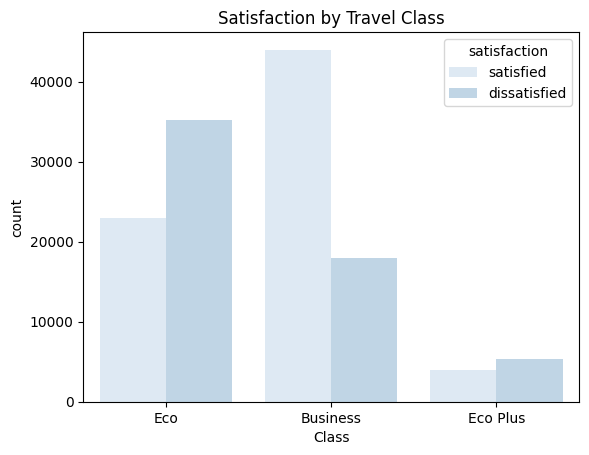

In [58]:
sns.set_palette("Blues")
sns.countplot(data=data, x='Class', hue='satisfaction')
plt.title("Satisfaction by Travel Class")
plt.show()


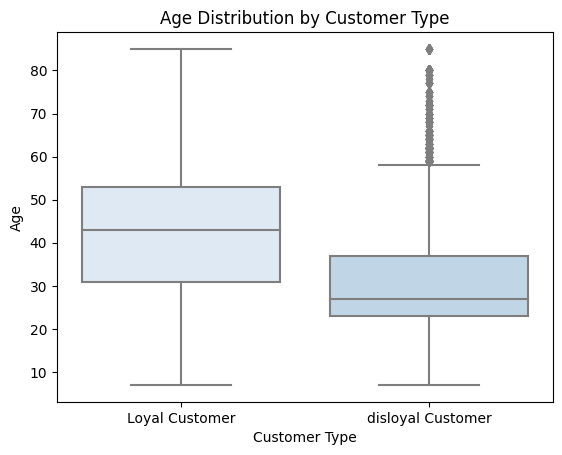

In [59]:
sns.boxplot(data=data, x='Customer Type', y='Age')
plt.title("Age Distribution by Customer Type")
plt.show()

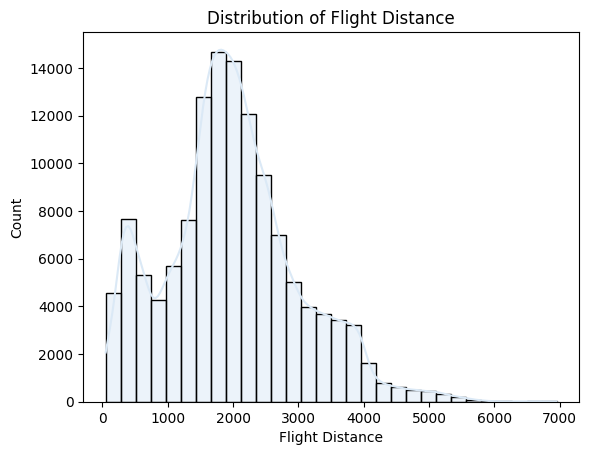

In [60]:
sns.histplot(data=data, x='Flight Distance', bins=30, kde=True)
plt.title("Distribution of Flight Distance")
plt.show()

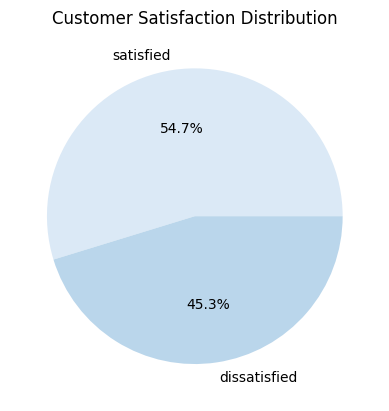

In [61]:
satisfaction_counts = data['satisfaction'].value_counts()
labels = satisfaction_counts.index
sizes = satisfaction_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Customer Satisfaction Distribution')
plt.show()


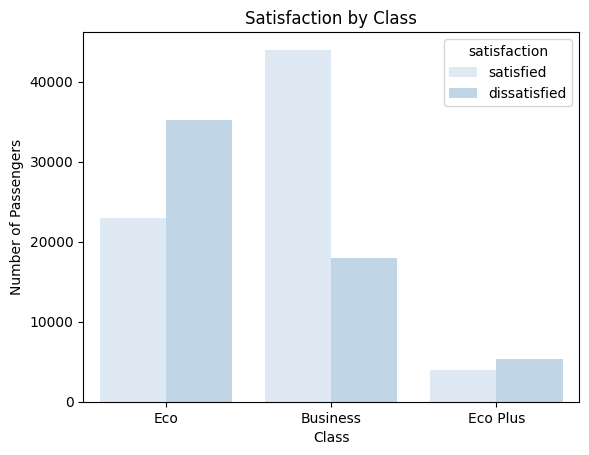

In [62]:
sns.countplot(data=data, x='Class', hue='satisfaction')
plt.title("Satisfaction by Class")
plt.ylabel("Number of Passengers")
plt.show()

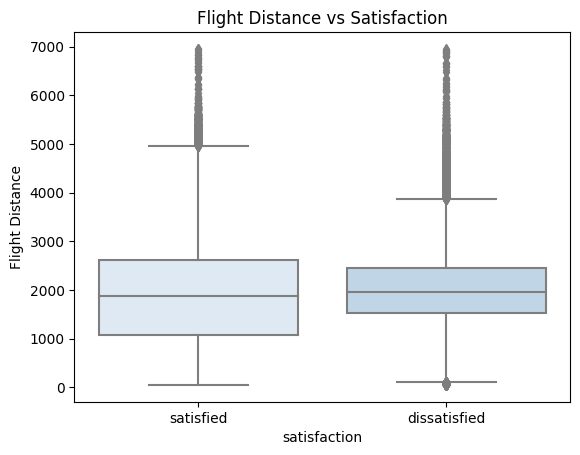

In [63]:
sns.boxplot(data=data, x='satisfaction', y='Flight Distance')
plt.title("Flight Distance vs Satisfaction")
plt.show()

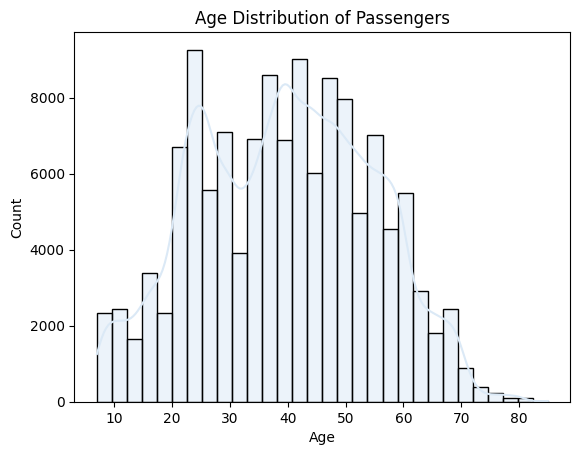

In [64]:
sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()

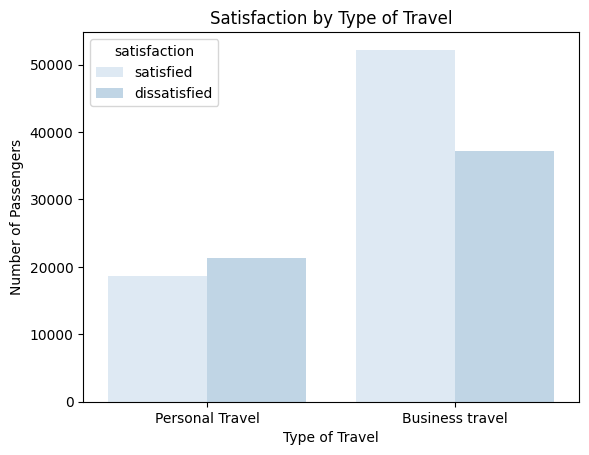

In [65]:
sns.countplot(data=data, x='Type of Travel', hue='satisfaction')
plt.title("Satisfaction by Type of Travel")
plt.ylabel("Number of Passengers")
plt.show()

## Data Transformation

In [66]:
cat_columns = ["satisfaction", "Gender", "Customer Type", "Type of Travel", "Class"]

label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [67]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,0,0,65,1,1,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,1,0,47,1,0,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,0,0,15,1,1,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,0,0,60,1,1,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,0,0,70,1,1,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [68]:
data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

In [69]:
data.dtypes

satisfaction                           int64
Gender                                 int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival De

## Modeling & Evaluation

In [70]:
X = data.drop(columns=["satisfaction"])
y = data["satisfaction"]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
def try_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plt.figure(figsize=(4, 2))
    sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt='d',cmap='Blues',linewidths=0.5,linecolor='white')

#### Logistic Regression Model

              precision    recall  f1-score   support

           0       0.80      0.71      0.76     11821
           1       0.78      0.85      0.82     14077

    accuracy                           0.79     25898
   macro avg       0.79      0.78      0.79     25898
weighted avg       0.79      0.79      0.79     25898



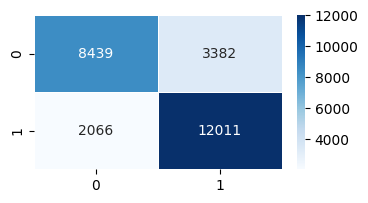

In [73]:
LogisticRegressionModel = LogisticRegression()
try_model(LogisticRegressionModel)

#### Random Forest Classifier Model

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11821
           1       0.97      0.96      0.96     14077

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



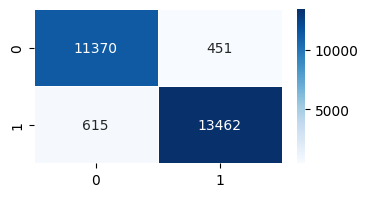

In [74]:
model=RandomForestClassifier()
try_model(model)

#### Gradient Boosting Classifier Model

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11821
           1       0.93      0.93      0.93     14077

    accuracy                           0.93     25898
   macro avg       0.93      0.93      0.93     25898
weighted avg       0.93      0.93      0.93     25898



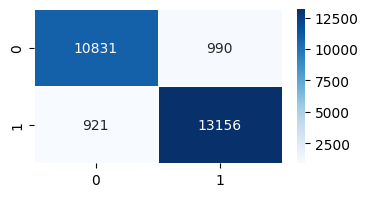

In [75]:
GradientBoostingClassifierModel=GradientBoostingClassifier()
try_model(GradientBoostingClassifierModel)

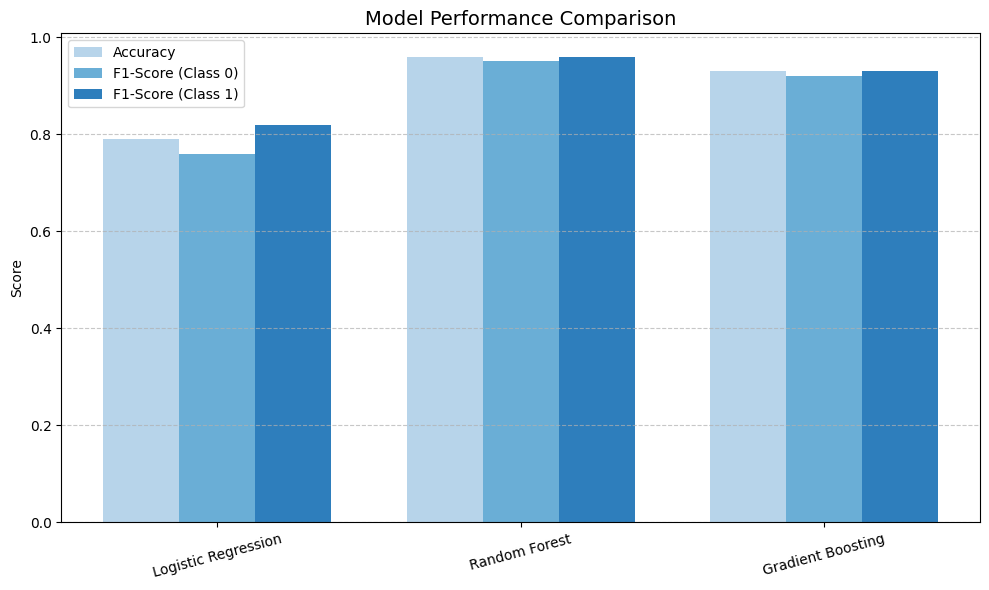

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Model names and metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracy = [0.79, 0.96, 0.93]
f1_class_0 = [0.76, 0.95, 0.92]
f1_class_1 = [0.82, 0.96, 0.93]

# Bar setup
x = np.arange(len(models))
width = 0.25
colors = [plt.get_cmap("Blues")(i) for i in np.linspace(0.3, 0.7, 3)]

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, accuracy, width, label='Accuracy', color=colors[0])
ax.bar(x, f1_class_0, width, label='F1-Score (Class 0)', color=colors[1])
ax.bar(x + width, f1_class_1, width, label='F1-Score (Class 1)', color=colors[2])

# Customize plot
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()